In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data_movies = pd.read_csv('./Data_IMDB_justMovies/data_movies_clean.csv')
data_ratings = pd.read_csv('./Data_IMDB_justMovies/data_ratings_clean.csv')

In [4]:
data_movies.head(3)

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,6.1,537,7,7
1,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,5.9,171,4,2
2,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,5.2,420,24,3


In [32]:
data_movies_year = (data_movies.groupby(['year']).agg({'imdb_title_id':'count'}).reset_index())
data_movies_year['country']=data_movies['country']
data_movies_year

,year,imdb_title_id,country
0,1906,1,Australia
1,1911,4,"Germany, Denmark"
2,1912,5,USA
3,1913,13,Italy
4,1914,21,USA
...,...,...,...
105,2015,2903,USA
106,2016,3033,Sweden
107,2017,3106,USA
108,2018,2880,USA


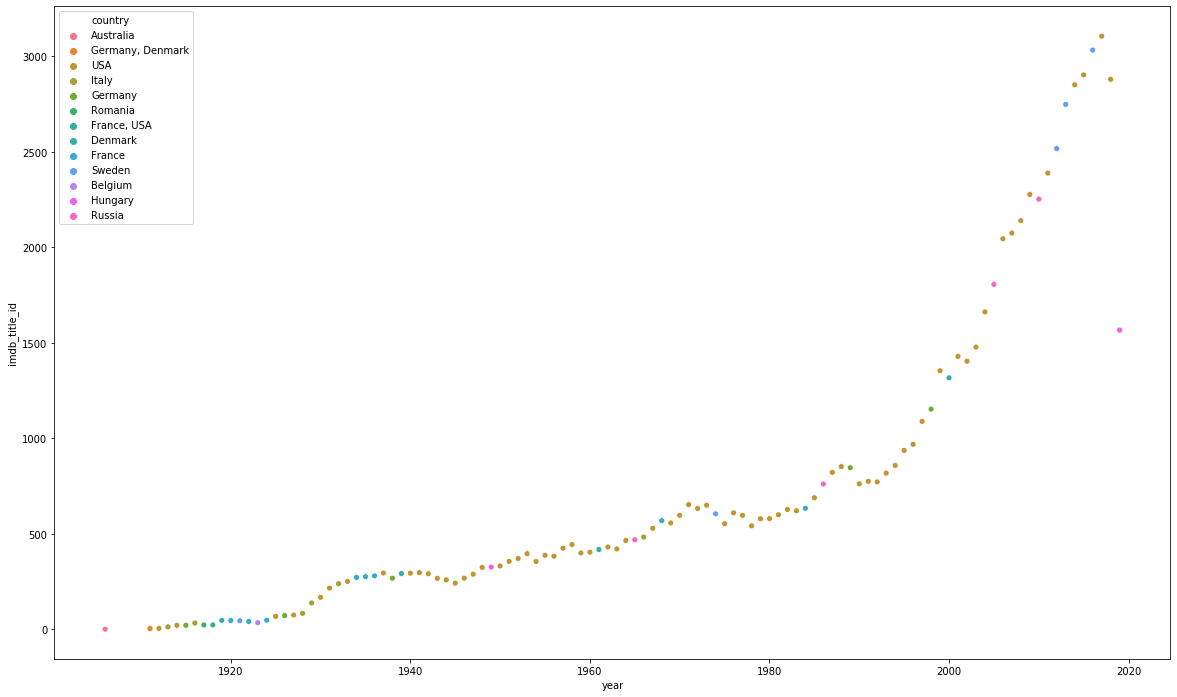

In [34]:
fig, ax = plt.subplots(figsize=(20,12))

sns.scatterplot(data=data_movies_year,
            x='year',
            y='imdb_title_id',
            hue='country')

In [37]:
data_movies_year['country'].nunique()

13

In [40]:
data_movies_ratings = pd.merge(data_movies, data_ratings, on='imdb_title_id', how='inner' )

In [41]:
data_movies_ratings['imdb_title_id'].nunique()

81273

In [45]:
data_movies_ratings.columns

Index(['imdb_title_id', 'title', 'year', 'date_published', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_18age_avg_vote',
       'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
       'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'u

In [50]:
data_movies_ratings['females_allages_votes']

0         48
1         16
2         39
3        205
4         29
        ... 
81268     17
81269      0
81270      0
81271      0
81272      1
Name: females_allages_votes, Length: 81273, dtype: int64

In [52]:
print(data_movies_ratings['females_allages_votes'].sum())
print(data_movies_ratings['males_allages_votes'].sum())

112141007
493045820


In [54]:
data_movies_ratings['votes'].sum()

765735595

In [59]:
112141007 + 493045820

605186827

In [61]:
data_movies_ratings['top1000_voters_votes'].sum()

6235557

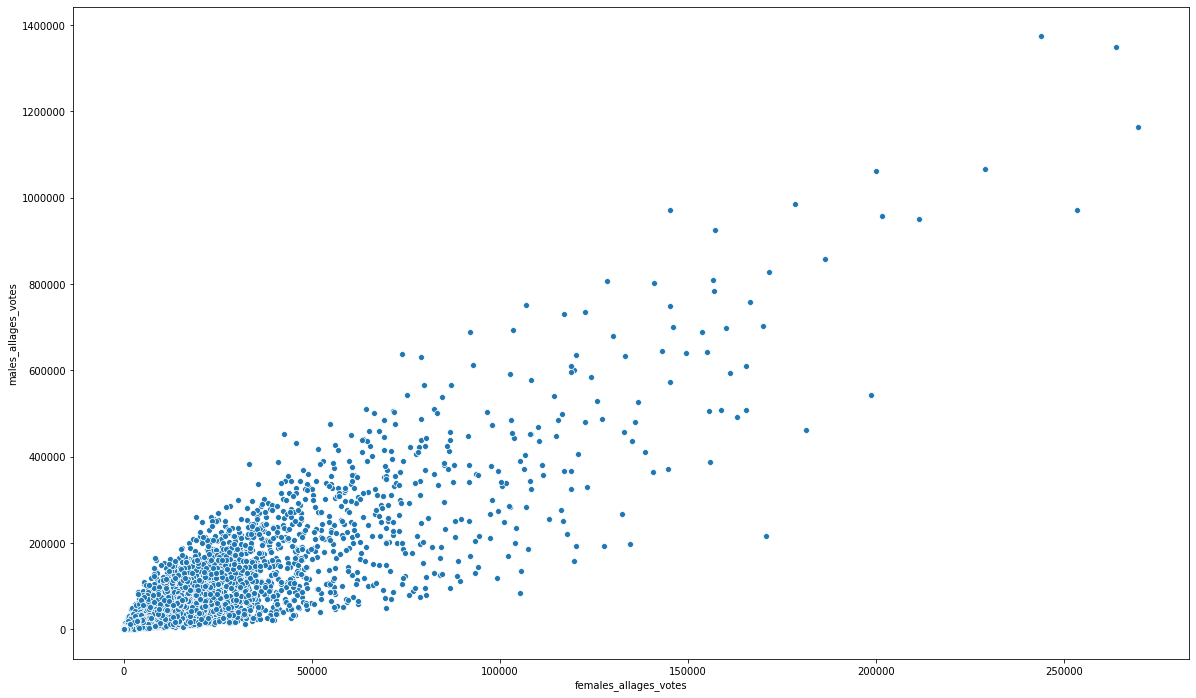

In [62]:
fig, ax = plt.subplots(figsize=(20,12))

sns.scatterplot(data=data_movies_ratings,
            x='females_allages_votes',
            y='males_allages_votes')

In [63]:
data_movies_ratings.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,6.0,19,6.6,14,6.3,64,6.0,89,6.2,309
1,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,5.8,4,6.5,8,5.9,29,6.2,27,6.0,114
2,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,5.5,14,6.2,20,4.9,57,5.5,197,4.7,103
3,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,7.3,74,7.4,75,7.0,126,7.1,452,7.0,1076
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1913-01-01,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,4.8,10,6.5,15,5.7,56,5.9,161,5.7,164


In [85]:
data_genre = (data_movies.groupby(['genre']).agg({'imdb_title_id':'count'}).reset_index())
data_genre['female']=data_movies_ratings['females_allages_votes']
data_genre['male']=data_movies_ratings['males_allages_votes']
data_genre.dtypes

genre            object
imdb_title_id     int64
female            int64
male              int64
dtype: object

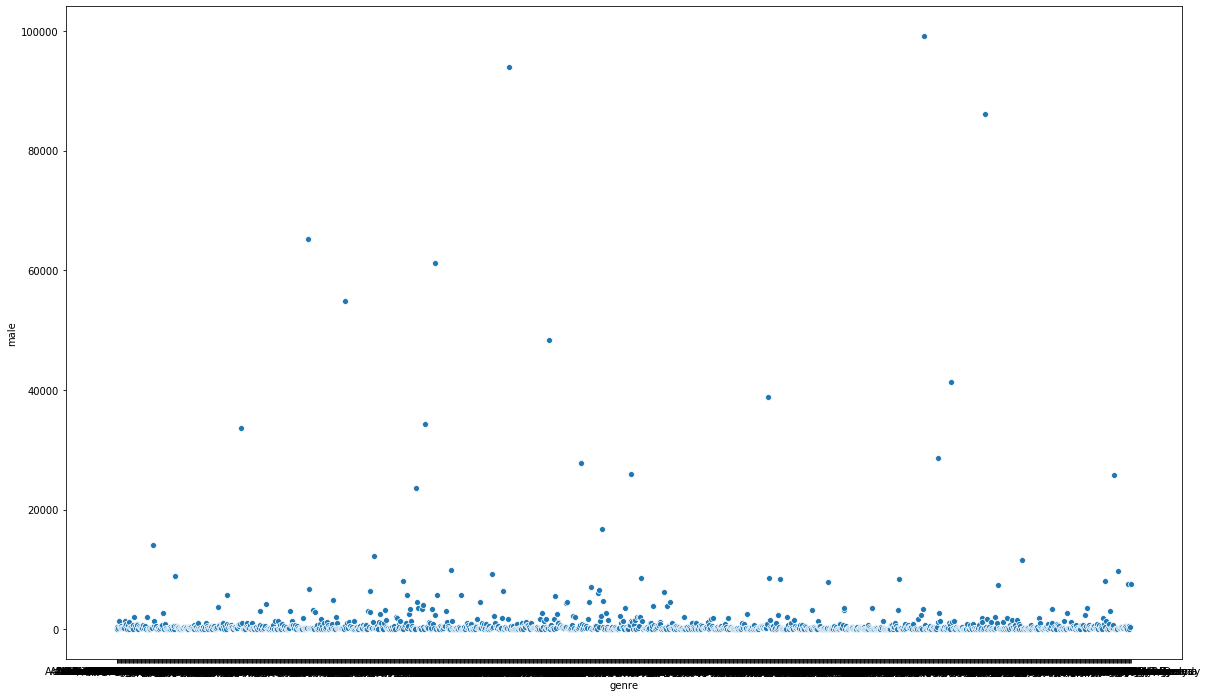

In [81]:
fig, ax = plt.subplots(figsize=(20,12))

sns.scatterplot(data=data_genre,
            x='genre',
            y='male')

In [79]:
data_genre = (data_genre['genre'].str.split(',', expand=True)).copy()
data_genre

KeyError: 'genre'

In [98]:
data_genre['movie_title']=data_movies_ratings['title']
data_genre

,genre,imdb_title_id,female,male,movie_title
0,Action,695,48,393,The Story of the Kelly Gang
1,"Action, Adventure",189,16,131,Den sorte drøm
2,"Action, Adventure, Biography",36,39,278,Cleopatra
3,"Action, Adventure, Comedy",546,205,1464,L'Inferno
4,"Action, Adventure, Crime",203,29,318,"From the Manger to the Cross; or, Jesus of Naz..."
...,...,...,...,...,...
1259,"Western, Comedy",6,925,7650,Horse Feathers
1260,"Western, Comedy, Drama",1,205,518,Hot Saturday
1261,"Western, Drama",4,16,94,Huddle
1262,"Western, Family",1,46,349,The Hurricane Express


In [113]:
duration = data_movies_ratings['duration'] < 90
old_movies = data_movies_ratings['year'] <= 1990
data_movies_ratings[duration & old_movie_horror]

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,6.0,19,6.6,14,6.3,64,6.0,89,6.2,309
1,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,5.8,4,6.5,8,5.9,29,6.2,27,6.0,114
3,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,7.3,74,7.4,75,7.0,126,7.1,452,7.0,1076
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1913-01-01,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,4.8,10,6.5,15,5.7,56,5.9,161,5.7,164
5,tt0002423,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",...,7.2,40,8.1,35,6.3,91,6.7,133,6.8,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74530,tt5300244,Osvobozhdenie: Proryv,1970,1970-05-09,"Drama, Romance, War",87,"Soviet Union, Poland, Yugoslavia, East Germany...",Russian,Yuriy Ozerov,"Yuri Bondarev, Oskar Kurganov",...,4.8,4,1.0,1,5.3,23,6.1,7,6.8,102
74531,tt5300252,Osvobozhdenie: Bitva za Berlin,1971,1971-11-05,"Drama, Romance, War",86,"Soviet Union, East Germany, Poland, Italy","Russian, German",Yuriy Ozerov,"Yuri Bondarev, Oskar Kurganov",...,4.7,3,1.0,1,5.5,22,5.3,7,6.8,94
74532,tt5300260,Osvobozhdenie: Posledniy shturm,1971,1971-11-05,"Drama, History, Romance",75,Soviet Union,NaN,Yuriy Ozerov,"Yuri Bondarev, Oskar Kurganov",...,5.2,4,1.0,1,5.7,22,6.1,6,7.1,95
76409,tt6035092,Tian shu qi tan,1983,1983-01-01,Animation,89,China,Chinese,"Shuchen Wang, Yunda Qian","Lei Bao, Shuchen Wang",...,8.1,6,1.0,1,2.5,11,8.3,11,7.4,92


In [95]:
data_genre.isnull().sum()

genre            0
imdb_title_id    0
female           0
male             0
dtype: int64

In [114]:
data_movies_ratings.columns

Index(['imdb_title_id', 'title', 'year', 'date_published', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_18age_avg_vote',
       'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
       'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'u

In [117]:
data_movies_ratings['genre'].head(30)

0       Biography, Crime, Drama
1                         Drama
2                Drama, History
3     Adventure, Drama, Fantasy
4              Biography, Drama
5     Biography, Drama, Romance
6                Drama, History
7                  History, War
8                         Drama
9                         Drama
10                 Crime, Drama
11                        Drama
12                 Crime, Drama
13                   Drama, War
14        Crime, Drama, Mystery
15                        Drama
16       Drama, Fantasy, Horror
17                 Crime, Drama
18             Adventure, Drama
19                        Drama
20         Crime, Drama, Horror
21                      Western
22    Adventure, Drama, History
23               Fantasy, Drama
24                 Crime, Drama
25                 Crime, Drama
26                 Crime, Drama
27                       Comedy
28                       Horror
29               Drama, Mystery
Name: genre, dtype: object

In [118]:
data_movies_ratings = data_movies_ratings.to_csv('data_movies_ratings.csv')